In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

## <span class="exercize">Exercise: draw the letter H</span>

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns a copy with a green letter H overlaid at those coordinates. The coordinates point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [2]:
from skimage import img_as_float

def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()
    
    canvas = out[coords[0]:coords[0] + 24,
                 coords[1]:coords[1] + 20]
    
    canvas[:, :3] = color
    canvas[:, -3:] = color
    canvas[11:14] = color
    
    return out

Test your function like so:

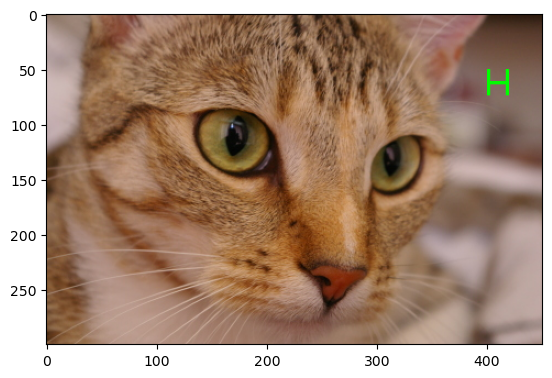

In [3]:
from skimage import data
import matplotlib.pyplot as plt

cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
_, ax = plt.subplots()
_ = ax.imshow(cat_H)

## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template:

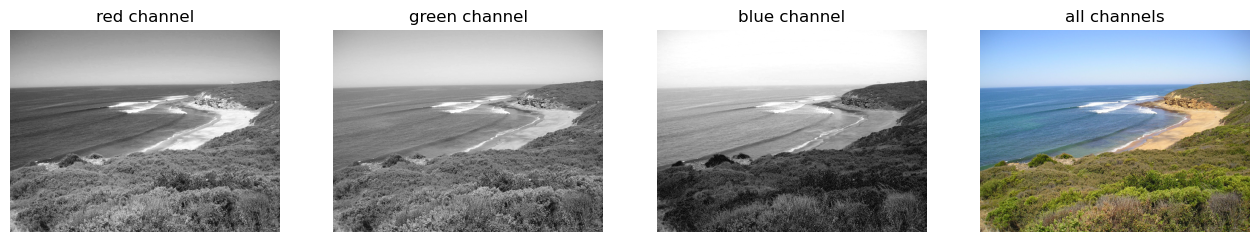

In [4]:
# --- read in the image ---

image = plt.imread('./images/Bells-Beach.jpg')

# --- assign each color channel to a different variable ---

r = image[..., 0]
g = image[..., 1]
b = image[..., 2]

# --- display the image and r, g, b channels ---

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

for ax in axes:
    ax.axis("off")

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap="gray")
ax_r.set_title("red channel")

ax_g.imshow(g, cmap="gray")
ax_g.set_title("green channel")

ax_b.imshow(b, cmap="gray")
ax_b.set_title("blue channel")

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
_ = ax_color.set_title("all channels")

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

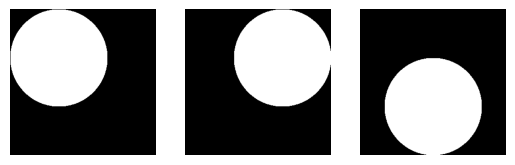

In [5]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.disk(center=(100, 100), radius=100)
red[r, c] = 1

r, c = draw.disk(center=(100, 200), radius=100)
green[r, c] = 1

r, c = draw.disk(center=(200, 150), radius=100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap="gray")
    ax.axis("off")

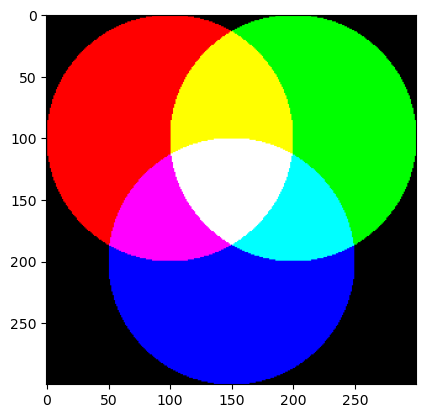

In [6]:
_, ax = plt.subplots()
_ = ax.imshow(np.stack([red, green, blue], axis=2))

## Exercise: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

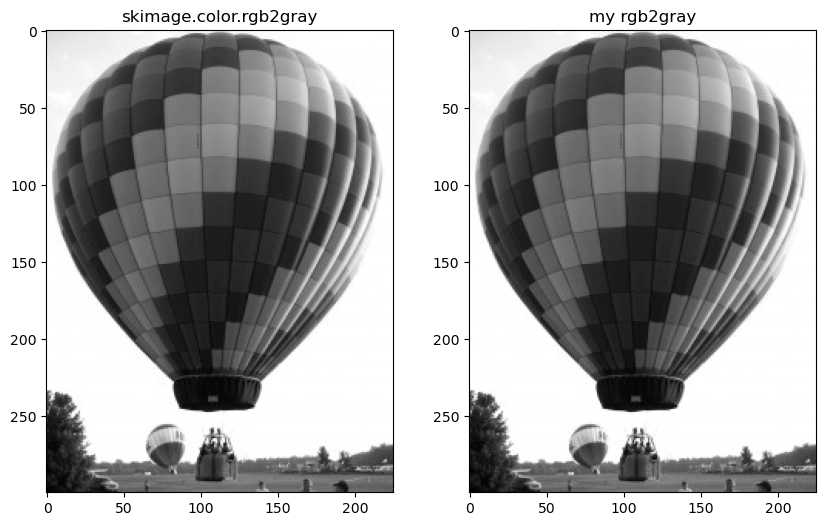

In [7]:
from skimage import io, color, img_as_float

image = img_as_float(io.imread("./images/balloon.jpg"))

gray = color.rgb2gray(image)
my_gray = image @ [0.2126, 0.7152, 0.0722]

# --- display the results ---

_, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap="gray")
ax0.set_title("skimage.color.rgb2gray")

ax1.imshow(my_gray, cmap="gray")
_ = ax1.set_title("my rgb2gray")

In [8]:
# Let's calculate the mean intensity error, as compared to
# scikit-image's color.rgb2gray
np.mean(np.abs(gray - my_gray))

2.209609295571941e-05